## Data cleaning and analysis

### Import Data

In [ ]:
#Load packages
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

We load dataset from https://saifmohammad.com/WebPages/TweetEmotionIntensity-dataviz.html

In [ ]:
# Useful functions to clean data

def remove_non_ASCII(text):
  '''remove non ASCII characters in text'''
  encoded_string = text.encode("ascii", "ignore")
  decode_string = encoded_string.decode()
  return decode_string


def remove_blanks(text):
  #remove tabs and several spaces
  text =  re.sub(r'(\\n|\\r|\\t)',' ',text)
  text = re.sub(r'\s+',' ',text)
  return text

def remove_mentions(text):
  text = re.sub(r'@\S*','',text)
  return text

def remove_url(text):
  text = re.sub(r'https?://\S+|www\.\S+','',text)
  return text

def remove_pct(text):
  text = re.sub(r'[\'\.\-!"#$%&\\*,:;<=>?@^`()|~={}\/\[\]\|#]',' ',text)
  return text

def lemmatize(text):
    '''lemmatize text data'''
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]
    return ' '.join(tokens) 

def remove_emoji(text):
  text = re.sub("["u"\U0001F600-\U0001F64F"  # emoticons
                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                   u"\U00002702-\U000027B0"
                   u"\U000024C2-\U0001F251"
                    "]+",' ',text)
  return text


In [ ]:
def load_data(path):
  '''load dataset from path'''
  data = pd.read_csv(path,
                     sep="\t",
                     header=None,
                     names=['id','tweet','emotion','intensity'])
  return data

In [ ]:
emotions = ['anger', 'fear', 'joy', 'sadness']

In [ ]:
#Import datasets for each emotion : data_anger_train, data_fear_train, data_joy_train, data_sadness_train and respectively for test.
for e in emotions:
  globals()['data_' + e + '_train'] = load_data('/content/drive/MyDrive/prediction_emotions/TRAIN/' + e + '.txt')
  globals()['data_' + e + '_dev'] = load_data('/content/drive/MyDrive/prediction_emotions/DEV/' + e + '.txt')
  globals()['data_' + e + '_test'] = load_data('/content/drive/MyDrive/prediction_emotions/TEST/' + e + '.txt')

In [ ]:
#check datasets
for e in emotions:
  for t in ['train', 'dev', 'test']:
    print('data_' + e + '_' + t)
    print('shape {}'.format(globals()['data_' + e + '_' + t].shape))
    print(globals()['data_' + e + '_' + t].head())
    print('\n\n')

data_anger_train
shape (857, 4)
      id                                              tweet emotion  intensity
0  10000  How the fu*k! Who the heck! moved my fridge!.....   anger      0.938
1  10001  So my Indian Uber driver just called someone t...   anger      0.896
2  10002  @DPD_UK I asked for my parcel to be delivered ...   anger      0.896
3  10003  so ef whichever butt wipe pulled the fire alar...   anger      0.896
4  10004  Don't join @BTCare they put the phone down on ...   anger      0.896



data_anger_dev
shape (84, 4)
      id                                              tweet emotion  intensity
0  10857  @ZubairSabirPTI  pls dont insult the word 'Molna'   anger      0.479
1  10858  @ArcticFantasy I would have almost took offens...   anger      0.458
2  10859  @IllinoisLoyalty that Rutgers game was an abom...   anger      0.562
3  10860  @CozanGaming that's what lisa asked before she...   anger      0.500
4  10861  Sometimes I get mad over something so minuscul...   anger

In [ ]:
data = pd.concat([data_anger_train,
                  data_fear_train,
                  data_joy_train,
                  data_sadness_train,
                  data_anger_test,
                  data_fear_test,
                  data_joy_test, 
                  data_sadness_test,
                  data_anger_dev,
                  data_fear_dev,
                  data_joy_dev,
                  data_sadness_dev], axis=0)

In [ ]:
data.shape

(7102, 4)

In [ ]:
data.columns

Index(['id', 'tweet', 'emotion', 'intensity'], dtype='object')

In [ ]:
data.drop(columns=['intensity'], axis=1, inplace=True)

In [ ]:
data.head()

,id,tweet,emotion
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger
1,10001,So my Indian Uber driver just called someone t...,anger
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger
3,10003,so ef whichever butt wipe pulled the fire alar...,anger
4,10004,Don't join @BTCare they put the phone down on ...,anger


In [ ]:
data.reset_index(inplace=True,drop=True)

In [ ]:
data['emotion'].value_counts() 

fear       2252
anger      1701
joy        1616
sadness    1533
Name: emotion, dtype: int64

In [ ]:
data['emotion'].value_counts(normalize=True)

fear       0.317094
anger      0.239510
joy        0.227542
sadness    0.215855
Name: emotion, dtype: float64

### Data Cleaning


In [ ]:
data['tweet'] = data['tweet'].apply(remove_non_ASCII)

In [ ]:
data['tweet'] = data['tweet'].apply(remove_blanks)

In [ ]:
#remove retweets
mask = (~data['tweet'].str.contains(r'\bRT\b'))  # does not contain "RT"
data = data.loc[mask]

In [ ]:
#remove very shor tweets
mask = data['tweet'].str.len() >3
data = data.loc[mask]

In [ ]:
#remove mentions
data['tweet'] = data['tweet'].apply(remove_mentions)

In [ ]:
#remove urls
data['tweet'] = data['tweet'].apply(remove_url)

In [ ]:
#lemmatize text
import spacy
nlp = spacy.load("en_core_web_sm")
data['tweet'] = data['tweet'].apply(lemmatize)

In [ ]:
data['tweet'] = data['tweet'].apply(remove_blanks)

In [ ]:
#export data with base cleaning
data_cleaned_base = data.copy()
data_cleaned_base.to_excel('/content/drive/MyDrive/prediction_emotions/data_cleaned.xlsx')

### Data Analysis

In [ ]:
#remove punctuation for analysis and put in lowercase
data['tweet'] = data['tweet'].apply(remove_pct)
data['tweet'] = data['tweet'].apply(lambda x : x.lower())
data['tweet'] = data['tweet'].apply(remove_blanks)

In [ ]:
data

,id,tweet,emotion
0,10000,how the fu k who the heck move pron fridge sho...,anger
1,10001,so pron indian uber driver just call someone t...,anger
2,10002,pron ask for pron parcel to be deliver to a p...,anger
3,10003,so ef whichever butt wipe pull the fire alarm ...,anger
4,10004,do not join pron put the phone down on pron ta...,anger
...,...,...,...
7097,40855,common app just randomly log pron out as pron ...,sadness
7098,40856,pron would rather laugh with the rare genius ...,sadness
7099,40857,if pron invest in pron new film pron will stop...,sadness
7100,40858,just watch django unchained other people may f...,sadness


In [ ]:
data['emotion'].value_counts()

fear       2252
anger      1701
joy        1616
sadness    1532
Name: emotion, dtype: int64

In [ ]:
data['emotion'].unique()

array(['anger', 'fear', 'joy', 'sadness'], dtype=object)

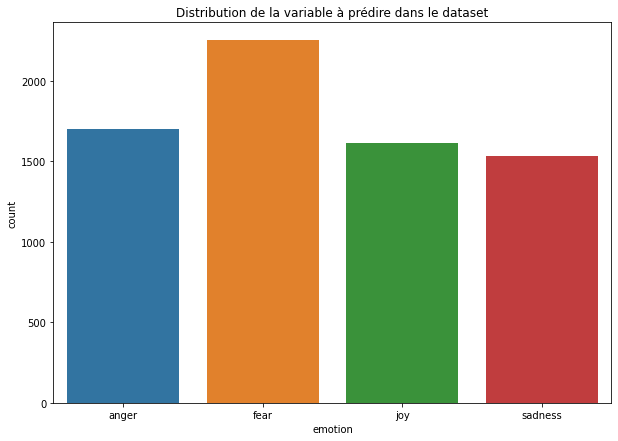

In [ ]:
sns.countplot(data=data, x='emotion')
plt.title('Distribution de la variable à prédire dans le dataset')
plt.show()

Length of tweets distribution

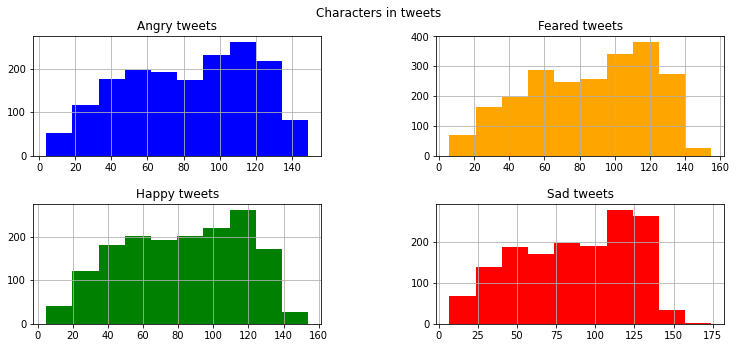

In [ ]:
fig,axs=plt.subplots(2,2,figsize=(12,5))
tweet_len=data[data['emotion']=='anger']['tweet'].str.len()
axs[0,0].hist(tweet_len,color='blue')
axs[0,0].set_title('Angry tweets')
axs[0,0].grid()
fig.suptitle('Angry tweets')

tweet_len=data[data['emotion']=='fear']['tweet'].str.len()
axs[0,1].hist(tweet_len,color='orange')
axs[0,1].set_title('Feared tweets')
axs[0,1].grid()
fig.suptitle('Characters in tweets')


tweet_len=data[data['emotion']=='joy']['tweet'].str.len()
axs[1,0].hist(tweet_len,color='green')
axs[1,0].set_title('Happy tweets')
axs[1,0].grid()
fig.suptitle('Characters in tweets')

tweet_len=data[data['emotion']=='sadness']['tweet'].str.len()
axs[1,1].hist(tweet_len,color='red')
axs[1,1].set_title('Sad tweets')
axs[1,1].grid()
fig.suptitle('Characters in tweets')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()


Distributions are quite similar.

Number of words in tweets

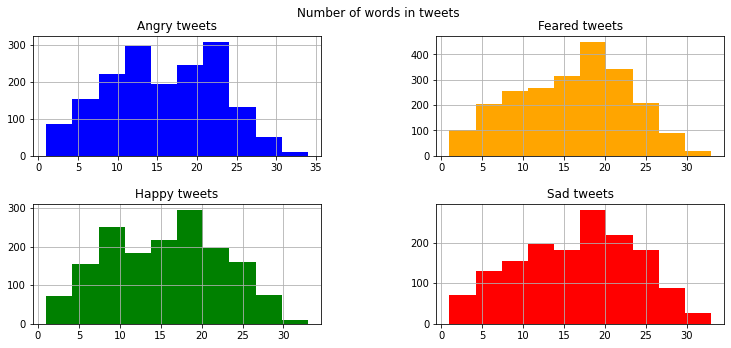

In [ ]:
fig,axs=plt.subplots(2,2,figsize=(12,5))
tweet_len=data[data['emotion']=='anger']['tweet'].str.split().map(lambda x: len(x))
axs[0,0].hist(tweet_len,color='blue')
axs[0,0].set_title('Angry tweets')
axs[0,0].grid()

tweet_len=data[data['emotion']=='fear']['tweet'].str.split().map(lambda x: len(x))
axs[0,1].hist(tweet_len,color='orange')
axs[0,1].set_title('Feared tweets')
axs[0,1].grid()


tweet_len=data[data['emotion']=='joy']['tweet'].str.split().map(lambda x: len(x))
axs[1,0].hist(tweet_len,color='green')
axs[1,0].set_title('Happy tweets')
axs[1,0].grid()

tweet_len=data[data['emotion']=='sadness']['tweet'].str.split().map(lambda x: len(x))
axs[1,1].hist(tweet_len,color='red')
axs[1,1].set_title('Sad tweets')
axs[1,1].grid()
fig.suptitle('Number of words in tweets')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()


Répartition presque uniforme pour le nombre d emots dans les tweets joyeux. 

In [ ]:
def lemmatize2(text):
    '''lemmatize text data for word cloud'''
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct or token.lemma_=='pron' or token.is_digit)]
    return ' '.join(tokens)

In [ ]:
def to_text(a):
  ''' Concatenate all the text data of the a serie'''
  text = ''
  for i in range(len(a)):
    text += ' ' + lemmatize2(a[i])
  return text

In [ ]:
from wordcloud import WordCloud
from collections import Counter

In [ ]:
anger_body = to_text(data[data['emotion']=='anger']['tweet'].tolist())
fear_body = to_text(data[data['emotion']=='fear']['tweet'].tolist())
joy_body = to_text(data[data['emotion']=='joy']['tweet'].tolist())
sadness_body = to_text(data[data['emotion']=='sadness']['tweet'].tolist())

In [ ]:
# Most common words in body
for i, df in enumerate([anger_body, fear_body, joy_body, sadness_body]):
  print(emotions[i] + ' :')
  c = Counter(df.split())
  print(c.most_common(10))
  print('\n')

anger :
[('like', 139), ('rage', 117), ('people', 99), ('offend', 96), ('anger', 92), ('s', 90), ('angry', 89), ('bitter', 74), ('amp', 71), ('revenge', 65)]


fear :
[('like', 150), ('fear', 117), ('start', 111), ('amp', 111), ('s', 95), ('think', 94), ('know', 93), ('bad', 89), ('anxiety', 87), ('awful', 87)]


joy :
[('happy', 159), ('smile', 155), ('love', 118), ('good', 115), ('day', 114), ('watch', 110), ('amp', 102), ('hilarious', 83), ('like', 82), ('s', 80)]


sadness :
[('sad', 105), ('lose', 104), ('amp', 98), ('like', 93), ('depression', 87), ('blue', 83), ('know', 83), ('feel', 81), ('sadness', 78), ('day', 72)]




Text(0.5, 1.0, 'Sad Tweets')

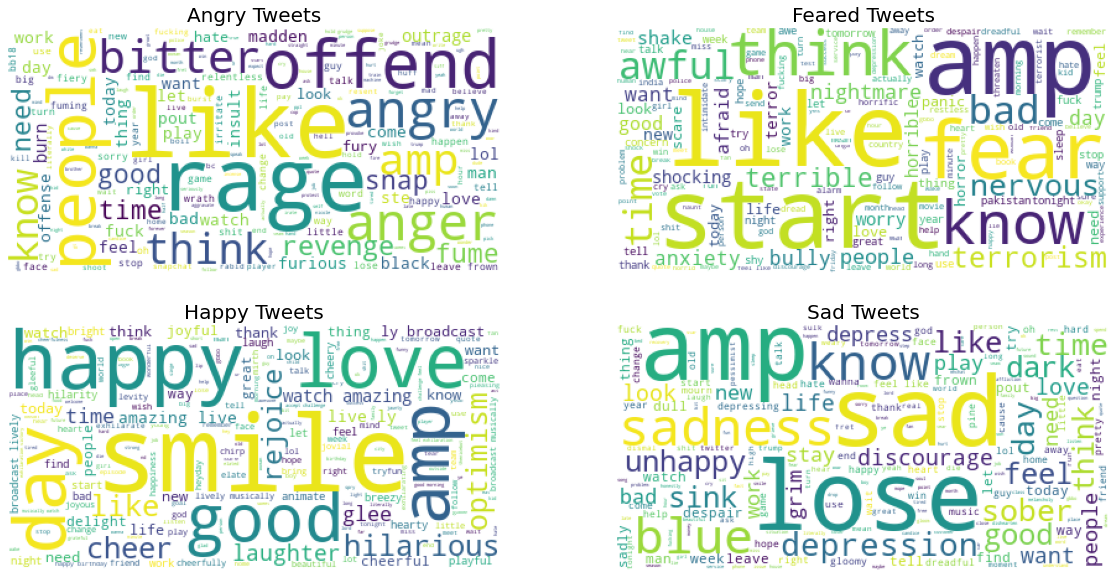

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=[20,10])
wordcloud1 = WordCloud(background_color = 'white',
                      random_state=0,
                      stopwords=[]).generate(anger_body)
axs[0,0].imshow(wordcloud1)
axs[0,0].axis('off')
axs[0,0].set_title('Angry Tweets',fontsize=20);

wordcloud2 = WordCloud(background_color = 'white',
                      random_state=0,
                      stopwords=[]).generate(fear_body)
axs[0,1].imshow(wordcloud2)
axs[0,1].axis('off')
axs[0,1].set_title('Feared Tweets',fontsize=20)

wordcloud3 = WordCloud(background_color = 'white',
                      random_state=0,
                      stopwords=[]).generate(joy_body)
axs[1,0].imshow(wordcloud3)
axs[1,0].axis('off')
axs[1,0].set_title('Happy Tweets',fontsize=20)

wordcloud4 = WordCloud(background_color = 'white',
                      random_state=0,
                      stopwords=[]).generate(sadness_body)
axs[1,1].imshow(wordcloud4)
axs[1,1].axis('off')
axs[1,1].set_title('Sad Tweets',fontsize=20)


In [ ]:
data

,id,tweet,emotion
0,10000,how the fu k who the heck move pron fridge sho...,anger
1,10001,so pron indian uber driver just call someone t...,anger
2,10002,pron ask for pron parcel to be deliver to a p...,anger
3,10003,so ef whichever butt wipe pull the fire alarm ...,anger
4,10004,do not join pron put the phone down on pron ta...,anger
...,...,...,...
7097,40855,common app just randomly log pron out as pron ...,sadness
7098,40856,pron would rather laugh with the rare genius ...,sadness
7099,40857,if pron invest in pron new film pron will stop...,sadness
7100,40858,just watch django unchained other people may f...,sadness


In [ ]:
def under_sample(data):
  class4, class3, class2, class1 = data.emotion.value_counts()
  c4 = data[data['emotion'] == 'anger']
  c3 = data[data['emotion'] == 'fear']
  c2 = data[data['emotion'] == 'joy']
  c1 = data[data['emotion'] == 'sadness']
  df_4 = c4.sample(class1, random_state=0)
  df_3 = c3.sample(class1, random_state=0)
  df_2 = c2.sample(class1, random_state=0)
  new_data = pd.concat([c1, df_2, df_3, df_4], axis=0)
  return new_data

In [ ]:
new_data = under_sample(data)

In [ ]:
new_data.emotion.value_counts()

sadness    1532
joy        1532
fear       1532
anger      1532
Name: emotion, dtype: int64

In [ ]:
new_data.shape

(6128, 3)

## Baseline models

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(new_data['tweet'], new_data['emotion'] , test_size = 0.20, random_state=42, stratify = new_data['emotion'] )

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(min_df = 0.005, max_df=0.90,sublinear_tf=True)
vectorised_train_documents = vectorizer.fit_transform(X_train).toarray()
vectorised_test_documents = vectorizer.transform(X_test).toarray()

In [ ]:
vectorised_train_documents.shape

(4902, 376)

In [ ]:
vectorised_test_documents.shape

(1226, 376)

In [ ]:
#KNN classifier

In [ ]:
param_grid = {'n_neighbors':np.arange(1,21)}

In [ ]:
score = 'accuracy'

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
clf = GridSearchCV(KNeighborsClassifier(),
                   param_grid,     
                   cv=5,           
                   scoring=score)   

clf.fit(vectorised_train_documents, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             scoring='accuracy')

In [ ]:
print(clf.best_params_)

{'n_neighbors': 1}


In [ ]:
clf.best_score_

0.51407643179596

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
knnPredictions = clf.predict(vectorised_test_documents)

In [ ]:
def prepare_resume():
    '''Fonction qui prépare un dataframe avec l'ensemble des éléments d'évaluation du modèle à compléter
    '''
    dg=pd.DataFrame(index=[], columns=['accuracy','f1-score'])
    return dg

In [ ]:
dg = prepare_resume()

In [ ]:
accuracy_score(knnPredictions,y_test)

0.5424143556280587

In [ ]:
dg.loc['KNN', 'accuracy'] = round(accuracy_score(knnPredictions,y_test),4)

In [ ]:
dg.loc['KNN', 'f1-score'] = round(f1_score(knnPredictions,y_test, average='macro'),4)

In [ ]:
f1_score(knnPredictions,y_test, average='macro')

0.5416708062480567

In [ ]:
# Linear SVC classifier

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
param_grid = {'C' : [0.1,1,10,50,100]}

In [ ]:
clf = GridSearchCV(LinearSVC(),
                   param_grid,     
                   cv=5,           
                   scoring=score)   

clf.fit(vectorised_train_documents, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 50, 100]}, scoring='accuracy')

In [ ]:
clf.best_params_

{'C': 0.1}

In [ ]:
clf.best_score_

0.7056306559320976

In [ ]:
lsvcPredictions = clf.predict(vectorised_test_documents)

In [ ]:
accuracy_score(lsvcPredictions,y_test)

0.702283849918434

In [ ]:
dg.loc['LinearSVC', 'accuracy'] = round(accuracy_score(lsvcPredictions, y_test),4)
dg.loc['LinearSVC', 'f1-score'] = round(f1_score(lsvcPredictions, y_test, average='macro'),4)

In [ ]:
dg

,accuracy,f1-score
KNN,0.5424,0.5417
LinearSVC,0.7023,0.7025


In [ ]:
# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
param_grid = {'C' : [0.1,1,10,50,100]}

In [ ]:
clf = GridSearchCV(LogisticRegression(),
                   param_grid,     
                   cv=5,           
                   scoring=score)   

clf.fit(vectorised_train_documents, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 50, 100]}, scoring='accuracy')

In [ ]:
clf.best_score_

0.6984896710977969

In [ ]:
clf.best_params_

{'C': 1}

In [ ]:
lgrPredictions = clf.predict(vectorised_test_documents)

In [ ]:
accuracy_score(lgrPredictions,y_test)

0.6982055464926591

In [ ]:
dg.loc['LogisticRegression', 'accuracy'] = round(accuracy_score(lgrPredictions, y_test),4)
dg.loc['LogisticRegression', 'f1-score'] = round(f1_score(lgrPredictions, y_test, average='macro'),4)

In [ ]:
dg

,accuracy,f1-score
KNN,0.5424,0.5417
LinearSVC,0.7023,0.7025
LogisticRegression,0.6982,0.6985


# RNN

### RNN1 : Avec nettoyage "de base", LSTM

Il s'agit du nettoyage effectué en 1ere partie à savoir on supprime:
- les tweets qui contiennent uniquement des caractères “non ASCII” 
- les tweets très courts (avec un nombre de caractères <=2)
- les mentions
- les URLS
- les retweets  
On lemmatize

In [ ]:
new_data = under_sample(data_cleaned_base)
new_data['tweet'] = new_data['tweet'].apply(lambda x: x.lower())

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(new_data['tweet'], new_data['emotion'] , test_size = 0.20, random_state=42, stratify = new_data['emotion'] )

In [ ]:
from keras.preprocessing.text import Tokenizer
vocab_size = 20000
oov_token = "<OOV>"
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)

In [ ]:
word_index = tokenizer.word_index

In [ ]:
list(word_index.items())[:10]

[('<OOV>', 1),
 ('pron', 2),
 ('be', 3),
 ('the', 4),
 ('to', 5),
 ('a', 6),
 ('and', 7),
 ('not', 8),
 ('of', 9),
 ('in', 10)]

In [ ]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [ ]:
max_length = 45
padding_type='post'
truncation_type='post'

In [ ]:
from keras.preprocessing.sequence import pad_sequences

X_test_padded = pad_sequences(X_test_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=truncation_type)

In [ ]:
X_train_padded = pad_sequences(X_train_sequences,maxlen=max_length, padding=padding_type, 
                       truncating=truncation_type)

In [ ]:
embedding_dict={}
with open('/content/drive/MyDrive/prediction_emotions/glove.6B.100d.txt','r') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

In [ ]:
print('Found %s word vectors.' % len(embedding_dict))

Found 400001 word vectors.


In [ ]:
embedding_matrix = np.zeros((len(word_index) + 1, 100))

for word, i in word_index.items():
    embedding_vector = embedding_dict.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
embedding_matrix.shape

(8997, 100)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [ ]:
encoder.classes_

array(['anger', 'fear', 'joy', 'sadness'], dtype=object)

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, SpatialDropout1D
from tensorflow.keras.initializers import Constant
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

embedding = Embedding(input_dim=len(word_index) + 1,
                      output_dim=100,
                      embeddings_initializer=Constant(embedding_matrix),
                      input_length=max_length,
                      trainable=False)
model=Sequential()
model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(4, activation='softmax'))


optimzer=Adam()

model.compile(loss='categorical_crossentropy', optimizer=optimzer, metrics=['accuracy'])

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:

history_1 = model.fit(X_train_padded, to_categorical(y_train), epochs=30, validation_data=(X_test_padded, to_categorical(y_test)), batch_size=32)

Epoch 1/30
154/154 [==============================] - 52s 300ms/step - loss: 1.3609 - accuracy: 0.2962 - val_loss: 1.2598 - val_accuracy: 0.3842
Epoch 2/30
154/154 [==============================] - 45s 295ms/step - loss: 1.2469 - accuracy: 0.3970 - val_loss: 1.1919 - val_accuracy: 0.4698
Epoch 3/30
154/154 [==============================] - 45s 290ms/step - loss: 1.1567 - accuracy: 0.4698 - val_loss: 1.0635 - val_accuracy: 0.5343
Epoch 4/30
154/154 [==============================] - 45s 293ms/step - loss: 1.0686 - accuracy: 0.5312 - val_loss: 0.9785 - val_accuracy: 0.6069
Epoch 5/30
154/154 [==============================] - 45s 293ms/step - loss: 0.9925 - accuracy: 0.5728 - val_loss: 0.8809 - val_accuracy: 0.6452
Epoch 6/30
154/154 [==============================] - 45s 291ms/step - loss: 0.9336 - accuracy: 0.6085 - val_loss: 0.8598 - val_accuracy: 0.6688
Epoch 7/30
154/154 [==============================] - 45s 290ms/step - loss: 0.8863 - accuracy: 0.6485 - val_loss: 0.7776 - val_ac

## RNN2 : suppression ponctuation + emojis, LSTM

En plus du nettoyage "de base", on enlève toute la ponctuation et les emojis.

In [ ]:
new_data = under_sample(data_cleaned_base)
new_data['tweet'] = new_data['tweet'].apply(remove_pct)
new_data['tweet'] = new_data['tweet'].apply(remove_emoji)
new_data['tweet'] = new_data['tweet'].apply(remove_blanks)
new_data['tweet'] = new_data['tweet'].apply(lambda x: x.lower())

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(new_data['tweet'], new_data['emotion'] , test_size = 0.20, random_state=42, stratify = new_data['emotion'] )


In [ ]:
from keras.preprocessing.text import Tokenizer
vocab_size = 20000
oov_token = "<OOV>"
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)

In [ ]:
word_index = tokenizer.word_index

In [ ]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [ ]:
max_length = 45
padding_type='post'
truncation_type='post'

In [ ]:
X_test_padded = pad_sequences(X_test_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=truncation_type)
X_train_padded = pad_sequences(X_train_sequences,maxlen=max_length, padding=padding_type, 
                       truncating=truncation_type)

In [ ]:
embedding_matrix = np.zeros((len(word_index) + 1, 100))

for word, i in word_index.items():
    embedding_vector = embedding_dict.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [ ]:
embedding = Embedding(input_dim=len(word_index) + 1,
                      output_dim=100,
                      embeddings_initializer=Constant(embedding_matrix),
                      input_length=max_length,
                      trainable=False)
model=Sequential()
model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(4, activation='softmax'))


optimzer=Adam()

model.compile(loss='categorical_crossentropy', optimizer=optimzer, metrics=['accuracy'])

In [ ]:
history_2 = model.fit(X_train_padded, to_categorical(y_train), epochs=30, validation_data=(X_test_padded, to_categorical(y_test)), batch_size=32)

Epoch 1/30
154/154 [==============================] - 49s 297ms/step - loss: 1.3842 - accuracy: 0.2699 - val_loss: 1.3733 - val_accuracy: 0.3148
Epoch 2/30
154/154 [==============================] - 46s 298ms/step - loss: 1.3098 - accuracy: 0.3472 - val_loss: 1.2208 - val_accuracy: 0.4062
Epoch 3/30
154/154 [==============================] - 47s 302ms/step - loss: 1.2212 - accuracy: 0.3978 - val_loss: 1.1382 - val_accuracy: 0.4307
Epoch 4/30
154/154 [==============================] - 46s 296ms/step - loss: 1.1619 - accuracy: 0.4241 - val_loss: 1.0870 - val_accuracy: 0.4633
Epoch 5/30
154/154 [==============================] - 46s 299ms/step - loss: 1.1248 - accuracy: 0.4594 - val_loss: 1.0423 - val_accuracy: 0.5261
Epoch 6/30
154/154 [==============================] - 46s 299ms/step - loss: 1.0669 - accuracy: 0.5151 - val_loss: 0.9710 - val_accuracy: 0.5498
Epoch 7/30
154/154 [==============================] - 47s 306ms/step - loss: 1.0011 - accuracy: 0.5583 - val_loss: 0.8943 - val_ac

## RNN3 : Nettoyage de base et bidirectionnal LSTM


In [ ]:
new_data = under_sample(data_cleaned_base)
new_data['tweet'] = new_data['tweet'].apply(lambda x: x.lower())

In [ ]:
X_train, X_test , y_train, y_test = train_test_split(new_data['tweet'], new_data['emotion'] , test_size = 0.20, random_state=42, stratify = new_data['emotion'] )

In [ ]:
vocab_size = 20000
oov_token = "<OOV>"
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)

In [ ]:
word_index = tokenizer.word_index

In [ ]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_test_padded = pad_sequences(X_test_sequences,maxlen=max_length, 
                               padding=padding_type, truncating=truncation_type)
X_train_padded = pad_sequences(X_train_sequences,maxlen=max_length, padding=padding_type, 
                       truncating=truncation_type)

In [ ]:
embedding_matrix = np.zeros((len(word_index) + 1, 100))

for word, i in word_index.items():
    embedding_vector = embedding_dict.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, SpatialDropout1D
from tensorflow.keras.initializers import Constant
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

embedding = Embedding(input_dim=len(word_index) + 1,
                      output_dim=100,
                      embeddings_initializer=Constant(embedding_matrix),
                      input_length=max_length,
                      trainable=False)
model=Sequential()
model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(4, activation='softmax'))
optimzer=Adam()

model.compile(loss='categorical_crossentropy',optimizer=optimzer,metrics=['accuracy'])

In [ ]:
history_3=model.fit(X_train_padded, to_categorical(y_train), epochs=30, validation_data=(X_test_padded,to_categorical(y_test)), batch_size=64)

Epoch 1/30
77/77 [==============================] - 17s 90ms/step - loss: 1.3072 - accuracy: 0.3731 - val_loss: 1.2442 - val_accuracy: 0.4062
Epoch 2/30
77/77 [==============================] - 5s 62ms/step - loss: 1.1505 - accuracy: 0.5053 - val_loss: 1.0113 - val_accuracy: 0.5734
Epoch 3/30
77/77 [==============================] - 5s 63ms/step - loss: 1.0039 - accuracy: 0.5832 - val_loss: 0.9275 - val_accuracy: 0.6199
Epoch 4/30
77/77 [==============================] - 5s 62ms/step - loss: 0.8591 - accuracy: 0.6589 - val_loss: 0.7700 - val_accuracy: 0.7039
Epoch 5/30
77/77 [==============================] - 5s 62ms/step - loss: 0.7760 - accuracy: 0.6962 - val_loss: 0.7062 - val_accuracy: 0.7333
Epoch 6/30
77/77 [==============================] - 5s 62ms/step - loss: 0.6824 - accuracy: 0.7344 - val_loss: 0.6644 - val_accuracy: 0.7365
Epoch 7/30
77/77 [==============================] - 5s 59ms/step - loss: 0.6055 - accuracy: 0.7664 - val_loss: 0.6030 - val_accuracy: 0.7610
Epoch 8/30
7

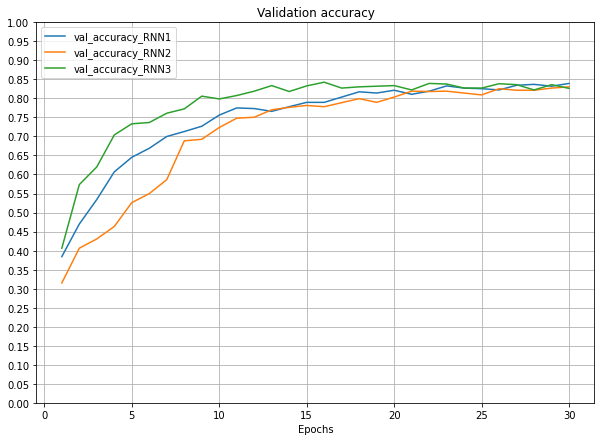

In [ ]:
plt.rcParams["figure.figsize"] = (10,7)
val_accuracy_1 = history_1.history['val_accuracy']
val_accuracy_2 = history_2.history['val_accuracy']
val_accuracy_3 = history_3.history['val_accuracy']
epochs = range(1,len(history_1.history['val_accuracy'])+1)

# Plot accuracy
plt.figure()
plt.plot(epochs, val_accuracy_1, label='val_accuracy_RNN1')
plt.plot(epochs, val_accuracy_2, label='val_accuracy_RNN2')
plt.plot(epochs, val_accuracy_3, label='val_accuracy_RNN3')
plt.title('Validation accuracy')
plt.xlabel('Epochs')
plt.yticks(ticks=np.arange(0, 1.02, 0.05))
plt.grid()
plt.legend(loc='upper left')
plt.show()

# BERT

### BERT uncased

In [ ]:
new_data = under_sample(data_cleaned_base)
new_data['tweet'] = new_data['tweet'].apply(lambda x: x.lower())

In [ ]:
encoder = LabelEncoder()
encoder.fit(new_data.emotion)
new_data['target'] = encoder.fit_transform(new_data.emotion)

In [ ]:
data_train, data_test = train_test_split(new_data, test_size = 0.20, random_state=42, stratify = new_data['emotion'] )

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(data_train.target.values)
y_test = to_categorical(data_test.target.values)

In [ ]:
!pip install transformers
import transformers

In [ ]:
from transformers import AutoTokenizer,TFBertModel
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
bert = TFBertModel.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
# Tokenize the input (takes some time) 
# here tokenizer using from bert-base-uncased
x_train = tokenizer(
    text=data_train.tweet.tolist(),
    add_special_tokens=True,
    max_length=62,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)
x_test = tokenizer(
    text=data_test.tweet.tolist(),
    add_special_tokens=True,
    max_length=62,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [ ]:
input_ids = x_train['input_ids']
attention_mask = x_train['attention_mask']

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.layers import Input, Dense

In [ ]:
max_len = 62
input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")

In [ ]:
embeddings = bert(input_ids,attention_mask = input_mask)[0] 
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32,activation = 'relu')(out)
y = Dense(4,activation = 'softmax')(out)
model4 = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model4.layers[2].trainable = True

In [ ]:
optimizer = Adam(
    learning_rate=5e-05, # this learning rate is for bert model , taken from huggingface website 
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0)
# Set loss and metrics
loss = CategoricalCrossentropy(from_logits = True)

# Compile the model
model4.compile(
    optimizer = optimizer,
    loss = 'categorical_crossentropy', 
    metrics = 'accuracy')

In [ ]:
history_4 = model4.fit(
    x ={'input_ids':x_train['input_ids'],'attention_mask':x_train['attention_mask']} ,
    y = y_train,
    validation_data = ({'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']}, y_test),
    epochs=5, batch_size=64)

Epoch 1/5
77/77 [==============================] - 80s 552ms/step - loss: 1.1373 - accuracy: 0.4794 - val_loss: 0.5878 - val_accuracy: 0.7855
Epoch 2/5
77/77 [==============================] - 39s 513ms/step - loss: 0.4463 - accuracy: 0.8435 - val_loss: 0.4141 - val_accuracy: 0.8564
Epoch 3/5
77/77 [==============================] - 39s 510ms/step - loss: 0.2810 - accuracy: 0.9000 - val_loss: 0.3841 - val_accuracy: 0.8670
Epoch 4/5
77/77 [==============================] - 39s 510ms/step - loss: 0.2137 - accuracy: 0.9264 - val_loss: 0.4024 - val_accuracy: 0.8662
Epoch 5/5
77/77 [==============================] - 39s 510ms/step - loss: 0.1625 - accuracy: 0.9388 - val_loss: 0.4159 - val_accuracy: 0.8630


In [ ]:
def predict_emotion(texts, model):
  texts = lemmatize(texts)
  x_val = tokenizer(
    text=texts,
    add_special_tokens=True,
    max_length=62,
    truncation=True,
    padding='max_length', 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True) 
  return encoder.inverse_transform([np.argmax(model.predict({'input_ids':x_val['input_ids'],'attention_mask':x_val['attention_mask']}))])[0]

In [ ]:
predict_emotion('I feel happy for the gift! Thank you', model4) 

'joy'

In [ ]:
predict_emotion('I passed my driving test !! #feel positive', model4) 

'fear'

In [ ]:
predict_emotion('I passed my driving test !! 😀😀😀', model4) 

'fear'

In [ ]:
predict_emotion('This play was wondeful!amazing! I wanna watch it again ! ', model4) 

'joy'

In [ ]:
predict_emotion('The tornado caused a lot of material and human damage. My thoughts are with the victims.', model4)

'fear'

In [ ]:
predict_emotion('The tornado caused a lot of material and human damage. I\'ve got so much pain for the victims.', model4)

'anger'

In [ ]:
predict_emotion('The tornado caused a lot of material and human damage. I feel so sad for the victims.', model4)

'sadness'

In [ ]:
predict_emotion('Once again, my train is late. Thank you to the company !!! I want to  be paid back.😠😠😠😠😠', model4)

'fear'

In [ ]:
predict_emotion('Once again, my train is late. Thank you to the company !!! I want to  be paid back.😠😠😠😠😠#unfair', model4)

'anger'

In [ ]:
data_test['predicted_model_4'] = data_test.tweet.apply(lambda x : predict_emotion(x, model4))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(data_test.emotion.values, data_test.predicted_model_4.values)

In [ ]:
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['anger', 'fear', 'joy', 'sadness'])

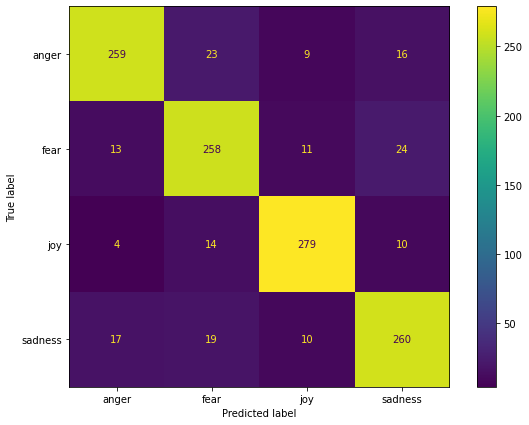

In [ ]:
cmd_obj.plot()

### BERT cased

In [ ]:
new_data = under_sample(data_cleaned_base)

In [ ]:
new_data.head()

,id,tweet,emotion
2827,40000,depression suck ! # depression,sadness
2828,40001,feel worthless as always # depression,sadness
2829,40002,feel worthless as always,sadness
2830,40003,-PRON- # Fibromyalgia have be really bad latel...,sadness
2831,40004,-PRON- be think -PRON- be going to lie in bed ...,sadness


In [ ]:
new_data['target'] = encoder.transform(new_data.emotion)

In [ ]:
data_train, data_test = train_test_split(new_data, test_size = 0.20, random_state=42, stratify = new_data['emotion'] )

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(data_train.target.values)
y_test = to_categorical(data_test.target.values)

In [ ]:
from transformers import AutoTokenizer,TFBertModel
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
# Tokenize the input (takes some time) 
# here tokenizer using from bert-base-uncased
x_train = tokenizer(
    text=data_train.tweet.tolist(),
    add_special_tokens=True,
    max_length=62,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)
x_test = tokenizer(
    text=data_test.tweet.tolist(),
    add_special_tokens=True,
    max_length=62,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [ ]:
input_ids = x_train['input_ids']
attention_mask = x_train['attention_mask']

In [ ]:
max_len = 62
input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")

In [ ]:
embeddings = bert(input_ids,attention_mask = input_mask)[0] 
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32,activation = 'relu')(out)
y = Dense(4,activation = 'softmax')(out)
model5 = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model5.layers[2].trainable = True

In [ ]:
optimizer = Adam(
    learning_rate=5e-05, # this learning rate is for bert model , taken from huggingface website 
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0)
# Set loss and metrics
loss = CategoricalCrossentropy(from_logits = True)

# Compile the model
model5.compile(
    optimizer = optimizer,
    loss = 'categorical_crossentropy', 
    metrics = 'accuracy')

In [ ]:
history_5 = model5.fit(
    x ={'input_ids':x_train['input_ids'],'attention_mask':x_train['attention_mask']} ,
    y = y_train,
    validation_data = ({'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']}, y_test),
    epochs=5, batch_size=64)

Epoch 1/5
77/77 [==============================] - 68s 548ms/step - loss: 1.2636 - accuracy: 0.3953 - val_loss: 0.7484 - val_accuracy: 0.7064
Epoch 2/5
77/77 [==============================] - 39s 510ms/step - loss: 0.5367 - accuracy: 0.8076 - val_loss: 0.4096 - val_accuracy: 0.8548
Epoch 3/5
77/77 [==============================] - 39s 509ms/step - loss: 0.3014 - accuracy: 0.8923 - val_loss: 0.3772 - val_accuracy: 0.8744
Epoch 4/5
77/77 [==============================] - 39s 510ms/step - loss: 0.2193 - accuracy: 0.9206 - val_loss: 0.4027 - val_accuracy: 0.8670
Epoch 5/5
77/77 [==============================] - 39s 509ms/step - loss: 0.1670 - accuracy: 0.9384 - val_loss: 0.4110 - val_accuracy: 0.8752


In [ ]:
predict_emotion('I feel happy for the gift! Thank you', model5) 

'joy'

In [ ]:
predict_emotion('This play was wondeful!amazing! I wanna watch it again ! ', model5) 

'joy'

In [ ]:
predict_emotion('I passed my driving test !! 😀😀😀', model5) 

'fear'

In [ ]:
predict_emotion('I passed my driving test !! 😀😀😀 #feel happy', model5) 

'joy'

In [ ]:
predict_emotion('I passed my driving test !! 😀😀😀 #positive', model5) 

'fear'

In [ ]:
predict_emotion('I passed my driving test !! 😀😀😀 #smile', model5) 

'joy'

In [ ]:
predict_emotion('The tornado caused a lot of material and human damage. My thoughts are with the victims.', model5)

'fear'

In [ ]:
predict_emotion('The tornado caused a lot of material and human damage. My thoughts are with the victims. #sadness', model5)

'sadness'

In [ ]:
predict_emotion('The tornado caused a lot of material and human damage. I\'ve got so much pain for the victims.', model5)

'fear'

In [ ]:
predict_emotion('The tornado caused a lot of material and human damage. I feel so sad for the victims.', model5)

'sadness'

In [ ]:
data_test['predicted_model_5'] = data_test.tweet.apply(lambda x : predict_emotion(x, model5))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(data_test.emotion.values, data_test.predicted_model_5.values)

In [ ]:
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['anger', 'fear', 'joy', 'sadness'])

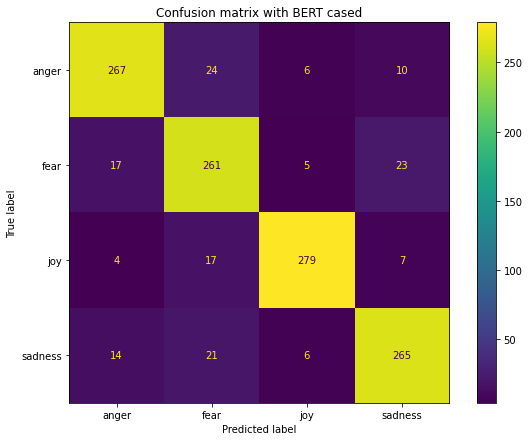

In [ ]:
cmd_obj.plot()
cmd_obj.ax_.set(title='Confusion matrix with BERT cased')
plt.show()

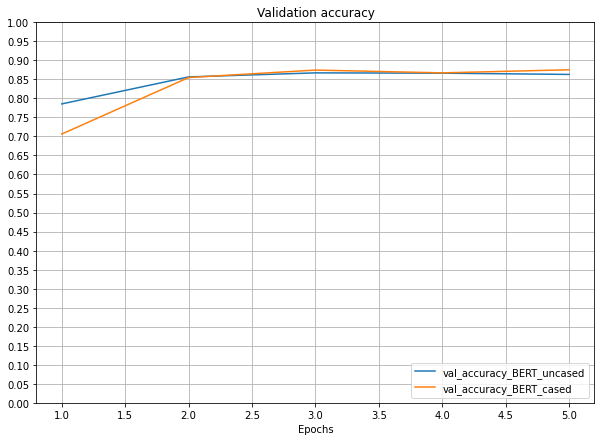

In [ ]:
plt.rcParams["figure.figsize"] = (10,7)
val_accuracy_BERTuncased = history_4.history['val_accuracy']
val_accuracy_BERT_cased = history_5.history['val_accuracy']
#val_accuracy_3 = history_3.history['val_accuracy']
epochs = range(1,len(history_4.history['val_accuracy'])+1)
#epochs3 = range(1,len(history_3.history['val_accuracy'])+1)
# Plot accuracy
plt.figure()
plt.plot(epochs, val_accuracy_BERTuncased, label='val_accuracy_BERT_uncased')
plt.plot(epochs, val_accuracy_BERT_cased, label='val_accuracy_BERT_cased')
#plt.plot(epochs3, val_accuracy_3, label='val_accuracy_RNN3')
plt.title('Validation accuracy')
plt.xlabel('Epochs')
plt.yticks(ticks=np.arange(0, 1.02, 0.05))
plt.grid()
plt.legend(loc='lower right')
plt.show()